<a href="https://colab.research.google.com/github/Marckhz/ml-uas/blob/main/NLP_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"marckhi","key":"b359a1a4cb50efd07267f163f01c3709"}'}

In [42]:
!pip install kaggle

In [43]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [44]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

amazon-fine-food-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [45]:
!ls

 amazon-fine-food-reviews.zip   files		   kaggle.json
 dummy_model.pkl	       'kaggle (1).json'   sample_data


In [46]:
!pip install boto3

In [47]:
import zipfile
zip_ref = zipfile.ZipFile('amazon-fine-food-reviews.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()


In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import joblib
import matplotlib.pyplot as plt

In [ ]:
import boto3

In [ ]:
import seaborn as sns

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [48]:
tfidf_params = {'stop_words':stopwords.words('english')}
pipe = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer(**tfidf_params)),
        ('classifier', LogisticRegression() )
    ]
)

In [49]:
df = pd.read_csv('files/Reviews.csv')

In [50]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [51]:
#above 3 is positive
#below 3 is negative

In [52]:
mod_df = df.copy()

In [53]:
mod_df['sentiment'] = mod_df['Score'].apply(lambda x: 'pos' if x > 3 else 'neg')

In [54]:
mod_df.Text.iloc[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(mod_df['Text'], mod_df['sentiment'], random_state=42, test_size=.2)

In [55]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegres

In [56]:
x_test_transform = pipe.predict(x_test)

In [57]:
cr = classification_report(x_test_transform, y_test,output_dict=True, )

In [58]:
print(cr)

{'neg': {'precision': 0.6846266115300413, 'recall': 0.8211524434719183, 'f1-score': 0.746700271937388, 'support': 20565}, 'pos': {'precision': 0.9586857624262848, 'recall': 0.9164680110817602, 'f1-score': 0.9371016354562972, 'support': 93126}, 'accuracy': 0.8992268517296884, 'macro avg': {'precision': 0.8216561869781631, 'recall': 0.8688102272768392, 'f1-score': 0.8419009536968426, 'support': 113691}, 'weighted avg': {'precision': 0.9091125645638221, 'recall': 0.8992268517296884, 'f1-score': 0.902660879013251, 'support': 113691}}


In [59]:
report_df = pd.DataFrame(cr).T
report_df['support'] = report_df.support.apply(lambda x : x / 10000 )

In [60]:
report_df[:2]

,precision,recall,f1-score,support
neg,0.684627,0.821152,0.746700,2.0565
pos,0.958686,0.916468,0.937102,9.3126


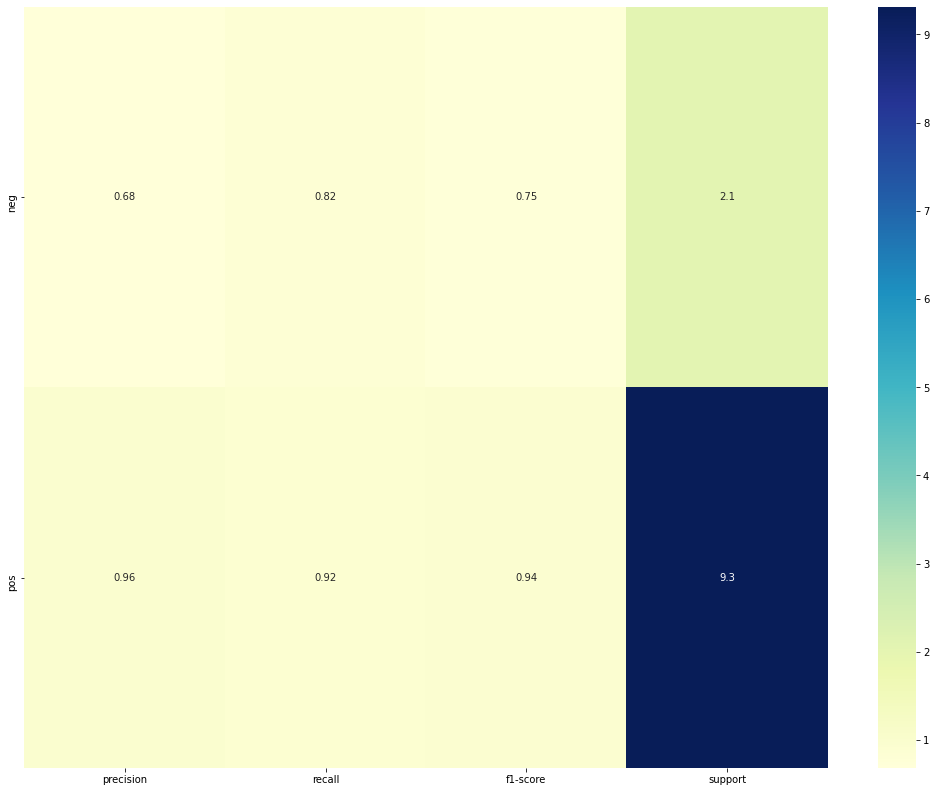

In [61]:
plt.figure(figsize=(18,14))
sns.heatmap(report_df[:2], annot=True, cmap="YlGnBu")

## precision

Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

## recall

Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

## f1 score

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

## support

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [62]:
test_review_pos = 'i find this product awesome, i love it. It is very useful. I will definitely will recommend.'
test_review_neg = 'this product sucks. I really hate it. Expensive and bad quality.'

In [63]:
test_review_undefined = 'asdads iasdad nasdd asdasda'

In [64]:
pipe.predict([test_review_pos])

array(['pos'], dtype=object)

In [65]:
pipe.predict([test_review_undefined])

array(['pos'], dtype=object)

In [66]:
pipe.predict([test_review_neg])

array(['neg'], dtype=object)

In [ ]:
joblib.dump(pipe, 'dummy_model.pkl')

['dummy_model.pkl']

In [ ]:
s3 = (
      boto3.session.Session(aws_access_key_id='X',
                                  aws_secret_access_key='X')
                    .client('s3', region_name='us-south',
                    endpoint_url='X')
)

In [ ]:
s3.upload_file('dummy_model.pkl', 'cloud-object-storage-tj-cos-standard-gx6', 'dummy_model.pkl')